In [1]:
import pandas as pd
import numpy as np

In [2]:
df_fbproph = pd.read_csv('../data/predicted/fbproph_month_predicted_nodeload1.csv')
df_neural = pd.read_csv('../data/predicted/neural_month_predicted_nodeload1.csv')
df_arima_pred = pd.read_csv('../data/predicted/arima_month_prediction_nodeload1.csv')
df_arima_fcst = pd.read_csv('../data/predicted/arima_month_forecast_nodeload1.csv')
df_fbproph['ds'] = pd.to_datetime(df_fbproph['ds'])
df_neural['ds'] = pd.to_datetime(df_neural['ds'])
df_arima_pred['ds'] = pd.to_datetime(df_arima_pred['ds'])

In [3]:
print(df_fbproph.head(5))

                   ds      yhat  yhat_lower  yhat_upper     trend  \
0 2024-05-14 04:37:05  2.748970    1.426997    3.986319  4.396291   
1 2024-05-14 04:37:10  2.749311    1.571359    4.053805  4.396290   
2 2024-05-14 04:37:15  2.749654    1.482886    3.996239  4.396289   
3 2024-05-14 04:37:20  2.749997    1.478944    4.083083  4.396288   
4 2024-05-14 04:37:25  2.750340    1.358274    3.996670  4.396287   

   trend_lower  trend_upper  
0     4.396291     4.396291  
1     4.396290     4.396290  
2     4.396289     4.396289  
3     4.396288     4.396288  
4     4.396287     4.396287  


In [4]:
print(df_neural.head(5))

                   ds     y     yhat1     trend  season_weekly  season_daily
0 2024-05-13 00:00:00  6.61  6.256499  6.769352      -0.073177     -0.439676
1 2024-05-13 00:00:05  6.66  6.256410  6.769264      -0.073177     -0.439676
2 2024-05-13 00:00:10  6.66  6.256321  6.769175      -0.073177     -0.439676
3 2024-05-13 00:00:15  6.41  6.256233  6.769086      -0.073177     -0.439676
4 2024-05-13 00:00:20  6.41  6.256145  6.768998      -0.073177     -0.439676


In [5]:
print(df_arima_pred.head(5))
print(df_arima_fcst.head(5))

                   ds  predicted_mean
0 2024-05-13 00:00:00        0.000000
1 2024-05-13 00:00:05        6.610000
2 2024-05-13 00:00:10        6.660000
3 2024-05-13 00:00:15        6.660000
4 2024-05-13 00:00:20        6.410002
                  date  predicted_mean  lower_ci  upper_ci
0  2024-06-14 00:00:05            2.84  2.208034  3.471966
1  2024-06-14 00:00:10            2.84  1.946268  3.733732
2  2024-06-14 00:00:15            2.84  1.745408  3.934592
3  2024-06-14 00:00:20            2.84  1.576075  4.103925
4  2024-06-14 00:00:25            2.84  1.426889  4.253111


In [6]:
# Convert 'ds' to datetime and set it as index
df_fbproph.set_index('ds', inplace=True)
df_fbproph_hourly = df_fbproph.resample('15T').mean().interpolate()


df_neural.set_index('ds', inplace=True)
df_neural_hourly = df_neural.resample('15T').mean().interpolate()

df_arima_pred.set_index('ds', inplace=True)
df_arima_pred_hourly = df_arima_pred.resample('15T').mean().interpolate()

/var/folders/bq/b47vvv5n2kxgsnrpx8jqvtqm0000gn/T/ipykernel_1020/318411837.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_fbproph_hourly = df_fbproph.resample('15T').mean().interpolate()
/var/folders/bq/b47vvv5n2kxgsnrpx8jqvtqm0000gn/T/ipykernel_1020/318411837.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_neural_hourly = df_neural.resample('15T').mean().interpolate()
/var/folders/bq/b47vvv5n2kxgsnrpx8jqvtqm0000gn/T/ipykernel_1020/318411837.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_arima_pred_hourly = df_arima_pred.resample('15T').mean().interpolate()


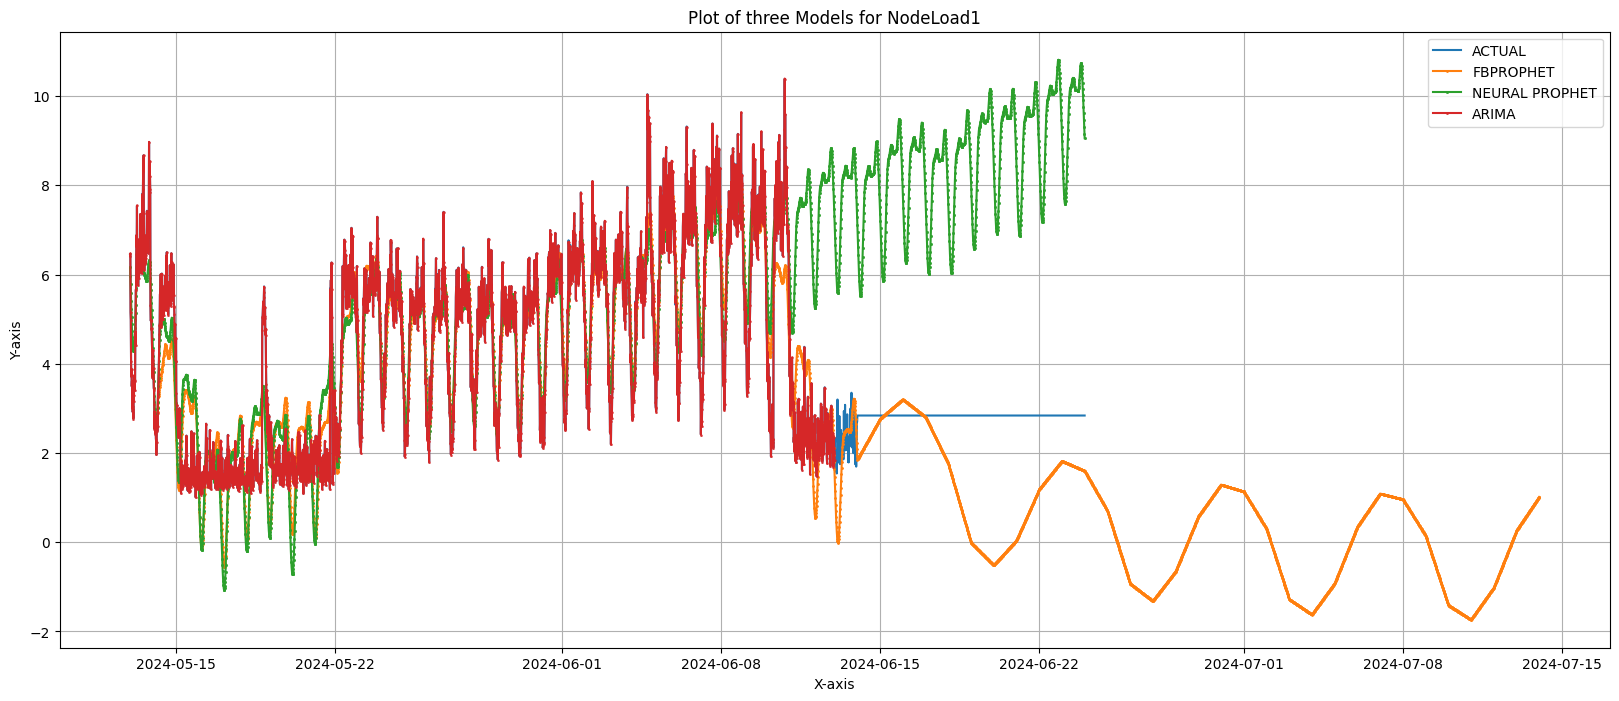

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))

# Plot each DataFrame
plt.plot(df_neural_hourly.index, df_neural_hourly['y'], label='ACTUAL')
plt.plot(df_fbproph_hourly.index, df_fbproph_hourly['yhat'], marker='o', markersize=1, label='FBPROPHET')
plt.plot(df_neural_hourly.index, df_neural_hourly['yhat1'], marker='s', markersize=1, label='NEURAL PROPHET')
plt.plot(df_arima_pred_hourly.index, df_arima_pred_hourly['predicted_mean'], marker='^', markersize=1, label='ARIMA')

# Adding titles and labels
plt.title('Plot of three Models for NodeLoad1')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()

# Show the plot
plt.show()